### <ins>Data Exploration & Analysis of Heart Failture Clinical Dataset<ins>
#### https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

### Import packages

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.mlab as mlab

### Load Data

In [3]:
HeartFail = pd.read_csv('C:/Users/Mia/OneDrive/Documents/GitHub/Final_Project/Datasets/heart_failure_clinical_records_dataset.csv')

In [3]:
HeartFail.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### <ins>Column Key<ins>
#### Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

####### sited from website: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

#### <ins>Correlation Matrix<ins>

In [4]:
HeartFail.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.0,0.088,-0.082,-0.1,0.06,0.093,-0.052,0.16,-0.046,0.065,0.019,-0.22,0.25
anaemia,0.088,1.0,-0.19,-0.013,0.032,0.038,-0.044,0.052,0.042,-0.095,-0.11,-0.14,0.066
creatinine_phosphokinase,-0.082,-0.19,1.0,-0.0096,-0.044,-0.071,0.024,-0.016,0.06,0.08,0.0024,-0.0093,0.063
diabetes,-0.1,-0.013,-0.0096,1.0,-0.0049,-0.013,0.092,-0.047,-0.09,-0.16,-0.15,0.034,-0.0019
ejection_fraction,0.06,0.032,-0.044,-0.0049,1.0,0.024,0.072,-0.011,0.18,-0.15,-0.067,0.042,-0.27
high_blood_pressure,0.093,0.038,-0.071,-0.013,0.024,1.0,0.05,-0.0049,0.037,-0.1,-0.056,-0.2,0.079
platelets,-0.052,-0.044,0.024,0.092,0.072,0.05,1.0,-0.041,0.062,-0.13,0.028,0.011,-0.049
serum_creatinine,0.16,0.052,-0.016,-0.047,-0.011,-0.0049,-0.041,1.0,-0.19,0.007,-0.027,-0.15,0.29
serum_sodium,-0.046,0.042,0.06,-0.09,0.18,0.037,0.062,-0.19,1.0,-0.028,0.0048,0.088,-0.2
sex,0.065,-0.095,0.08,-0.16,-0.15,-0.1,-0.13,0.007,-0.028,1.0,0.45,-0.016,-0.0043


#### <ins>Heat Map<ins>

<AxesSubplot:>

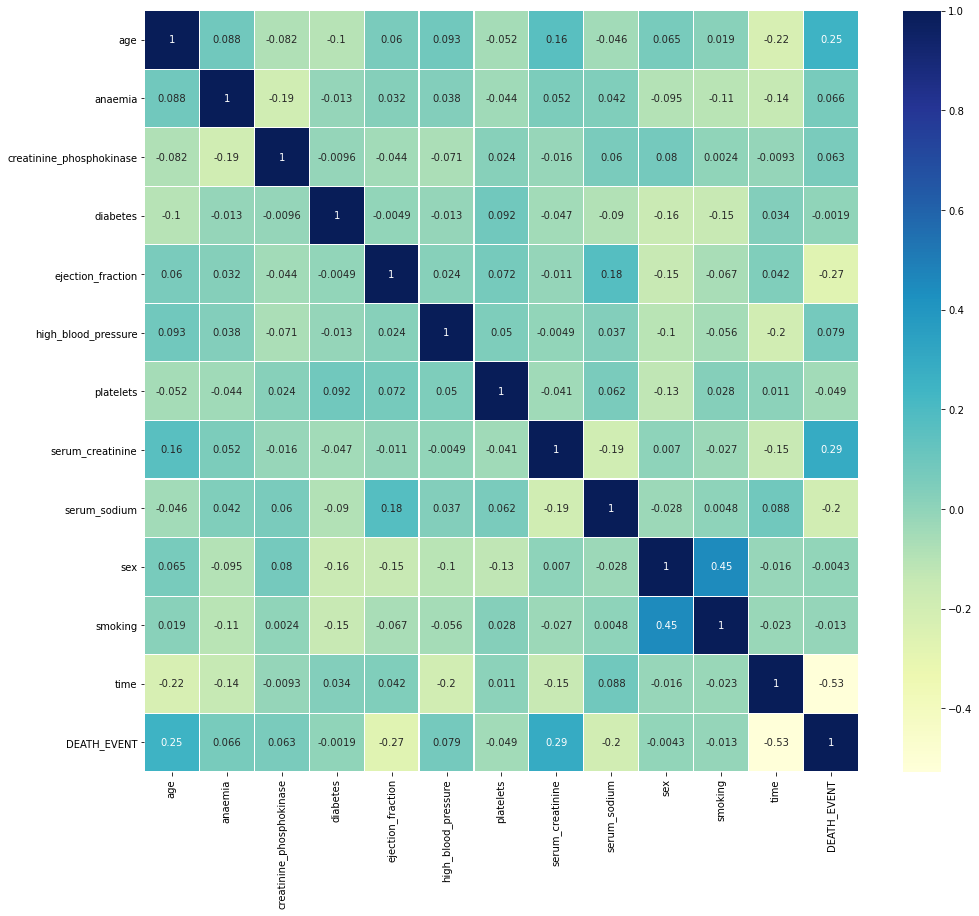

In [5]:
plt.figure(figsize=(16,14))
sns.heatmap(HeartFail.corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

#### <ins>Pairplots<ins>

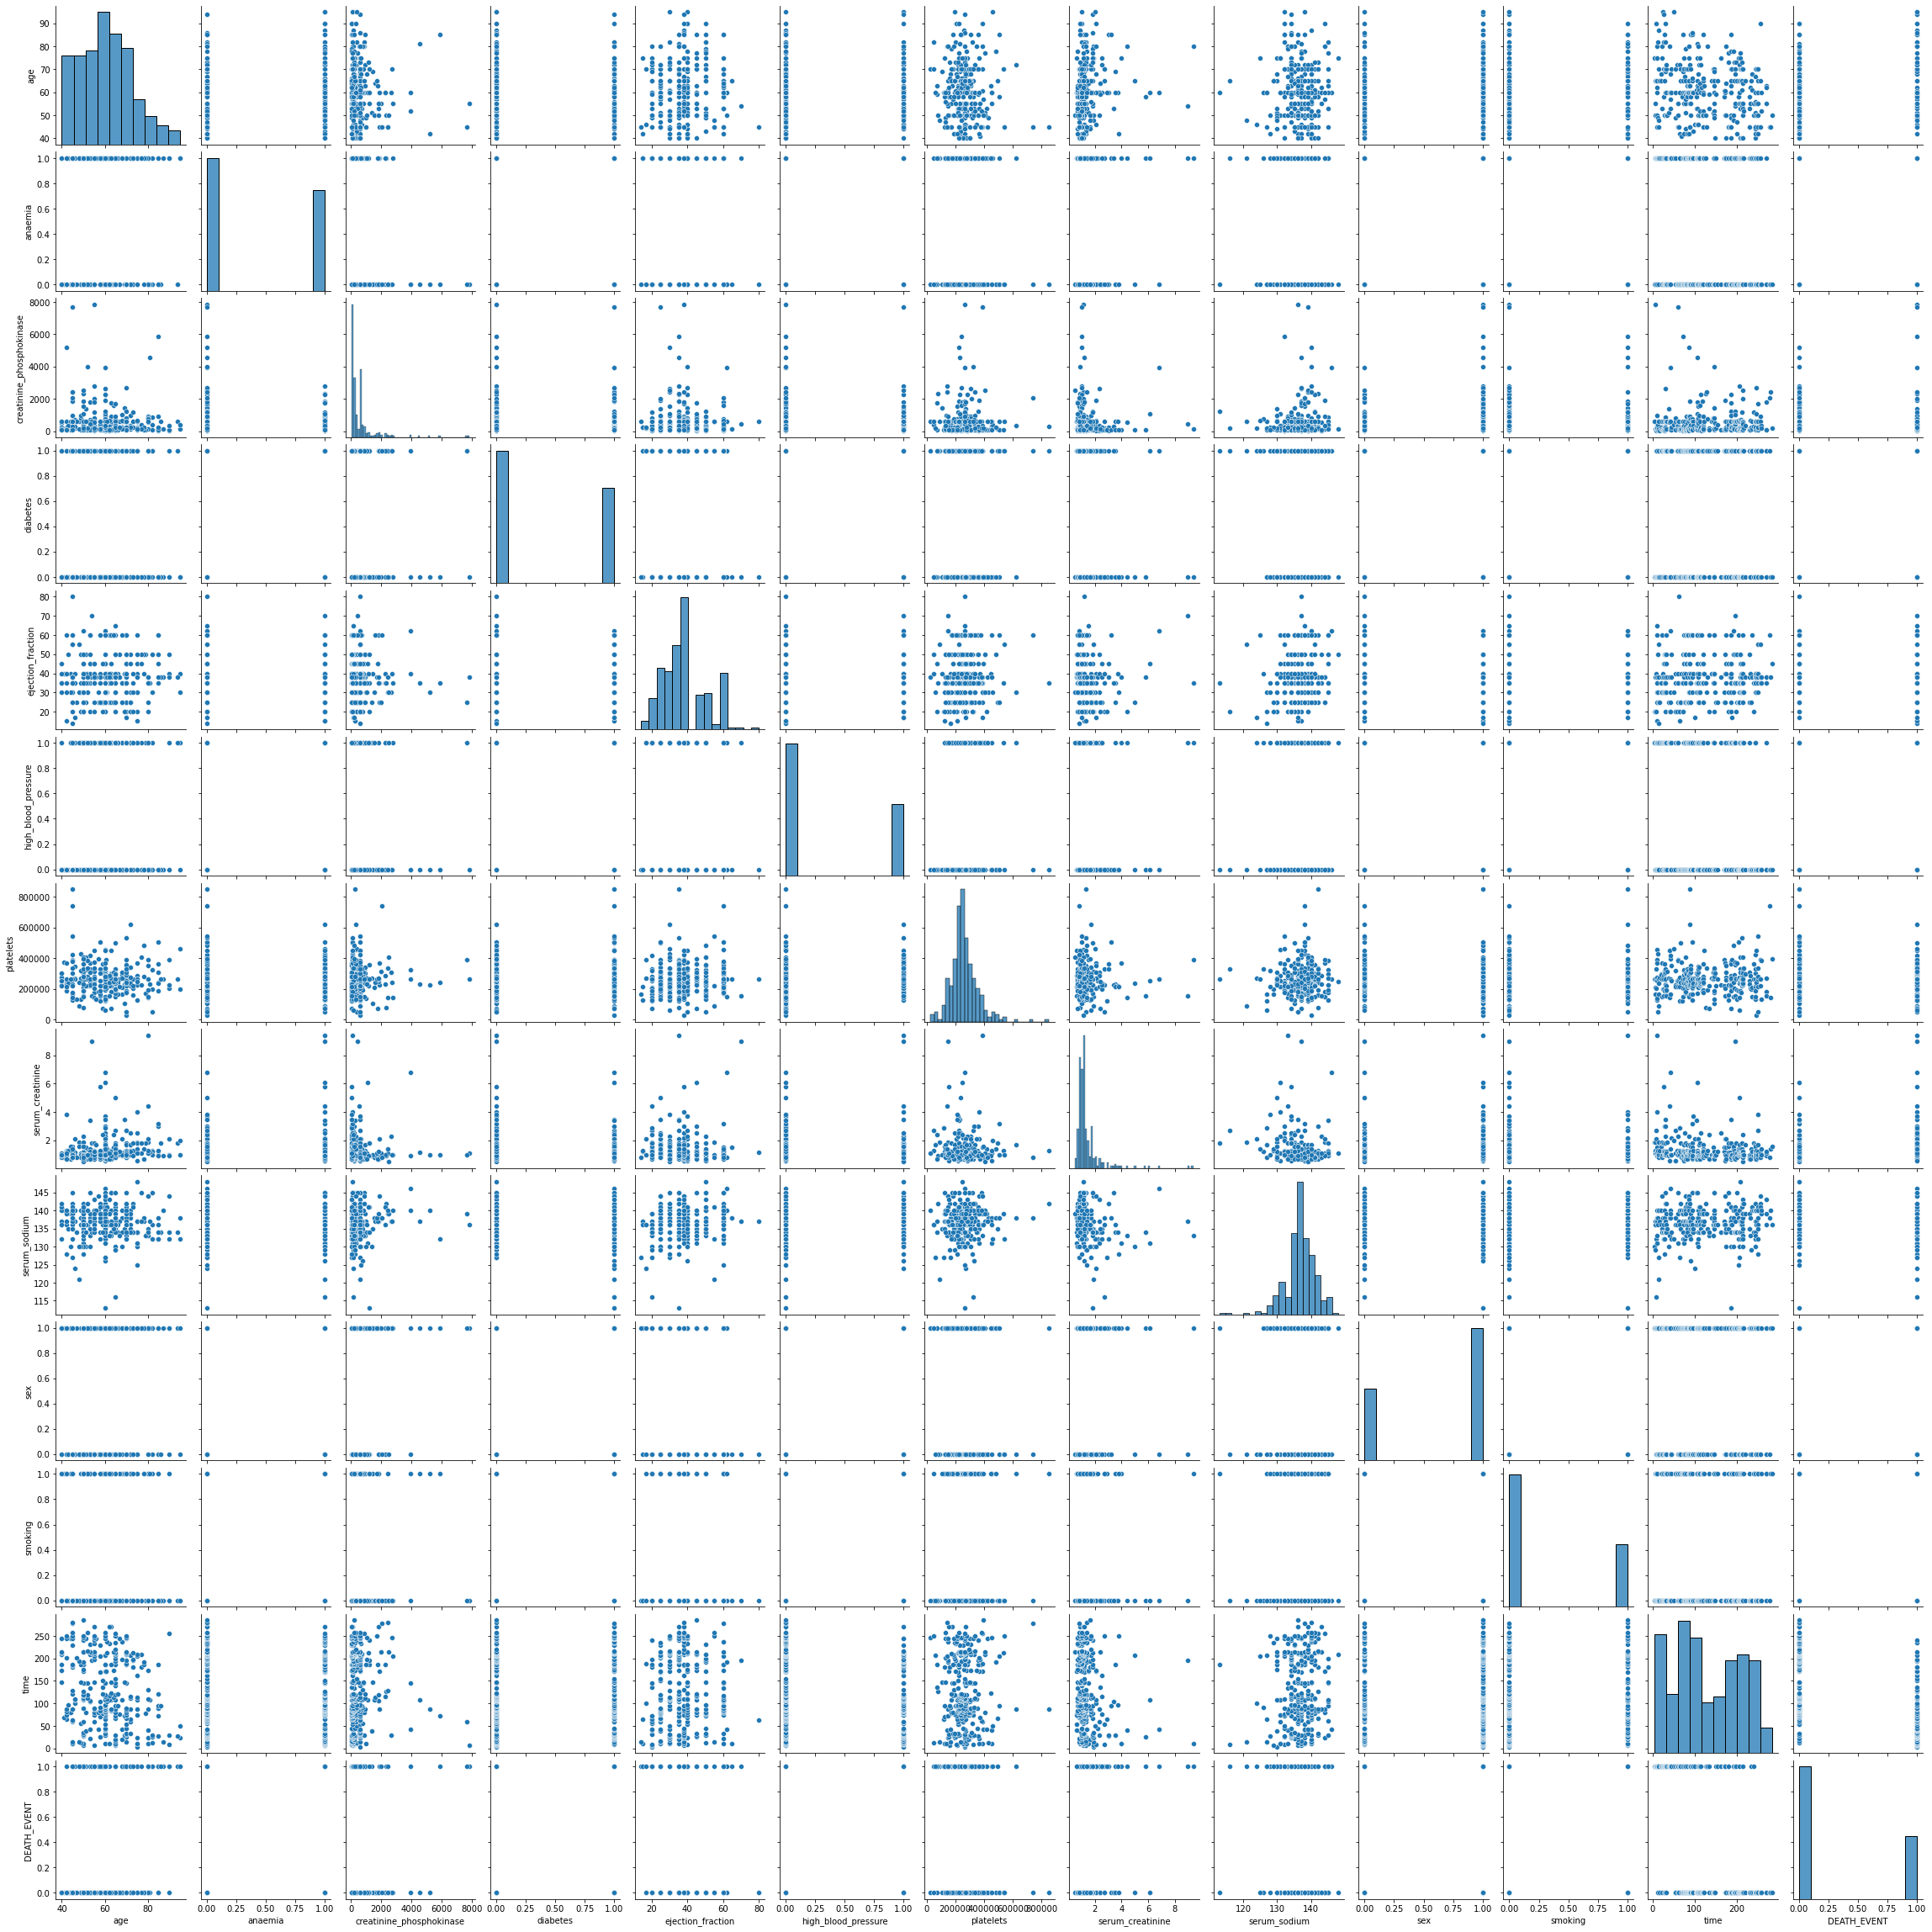

In [6]:
sns.pairplot(HeartFail)

#### <ins>Bar Charts<ins>

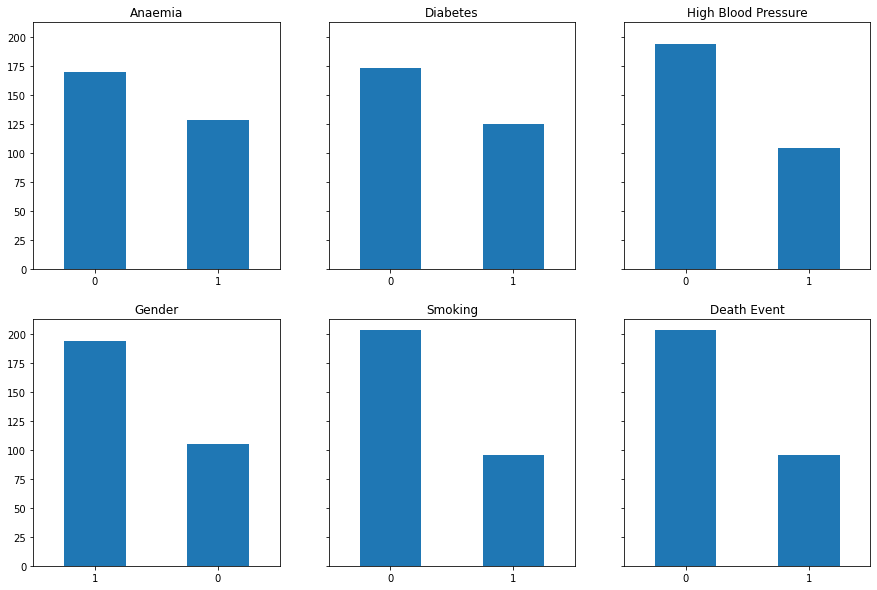

In [10]:
fig, axes = plt.subplots(2, 3, figsize = (15,10), sharey = True)
HeartFail.anaemia.value_counts().plot.bar(title = 'Anaemia', ax=axes[0,0])
HeartFail.diabetes.value_counts().plot.bar(title ='Diabetes', ax=axes[0,1])
HeartFail.high_blood_pressure.value_counts().plot.bar(title = 'High Blood Pressure', ax=axes[0,2])
HeartFail.sex.value_counts().plot.bar(title = 'Gender', ax=axes[1,0])
HeartFail.smoking.value_counts().plot.bar(title = 'Smoking', ax=axes[1,1])
HeartFail.DEATH_EVENT.value_counts().plot.bar(title = 'Death Event', ax=axes[1,2])
for ax in fig.axes:
    ax.tick_params(labelrotation=0)
#I learned this code from my colleague Silvia

#### This data shows that quite a significant amount of people had anaemia. Several people had diabetes and high blood pressure. There are much more nonsmokers than smokers. There are significantly more males than females in the study. And thankfully, more people lived than died.

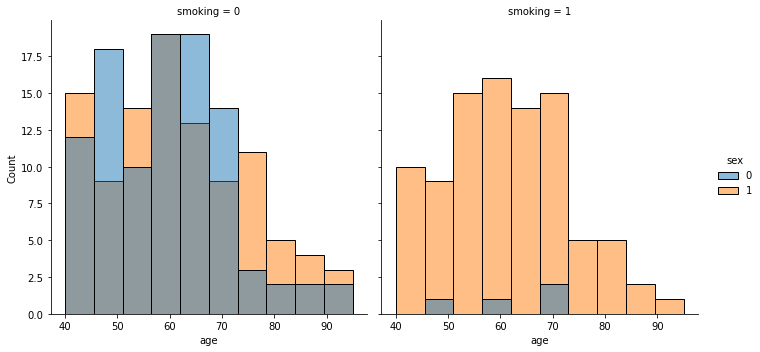

In [42]:

sns.displot(HeartFail, x= 'age', hue = 'sex', col = 'smoking', kind='hist')

#### Graphs show the age range of men and women as well as if they are smokers. The data shows much more male smokers than female smokers.

<AxesSubplot:xlabel='age', ylabel='Count'>

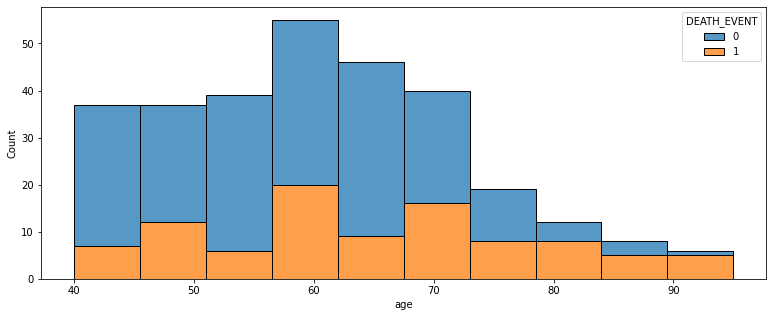

In [14]:
plt.figure(figsize = (13, 5))
sns.histplot(data = HeartFail, x = 'age', hue='DEATH_EVENT', multiple= 'stack')

#### Graph shows age and death events.

<AxesSubplot:xlabel='serum_creatinine', ylabel='Count'>

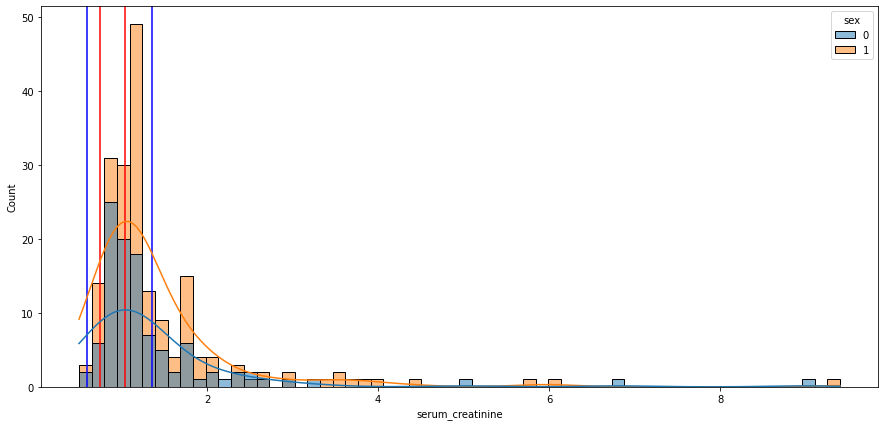

In [74]:
plt.figure(figsize = (15, 7))
plt.axvline(1.04, color = 'red')
plt.axvline(1.35, color = 'blue')
plt.axvline(.74, color = 'red')
plt.axvline(.59, color = 'blue')
sns.histplot(HeartFail, x= 'serum_creatinine', kde = True, hue='sex', color ='orange')
#This shows serum creatinine normal ranges for both men (blue lines) and women (red lines)

#### This graph shows serum creatinine levels for both men and women. The normal range for women is shown in the graph between the red lines at .74-1.04 mg/dL, and the normal range for men is shown inbetween the blue lines at .59-1.35mg/dL. 
####Resources for serum creatinine: https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

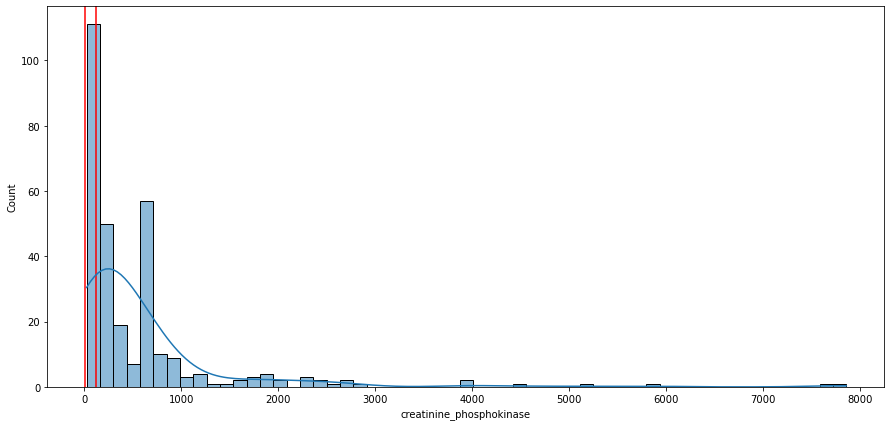

In [77]:
plt.figure(figsize = (15, 7))
plt.axvline(10, color ='red')
plt.axvline(120, color ='red')
sns.histplot(HeartFail.creatinine_phosphokinase, kde = True)

#This shows creatinine phosphokinase normal range of 10- 120 mcg/L in men and women

#### The above graph shows the normal range of creatinine phosphokinase inbetween 10 and 120  mcg/L. This data shows quite a bit of patients were outside the normal range here.

### https://www.ucsfhealth.org/medical-tests/creatine-phosphokinase-test

C:\Users\Mia\anaconda3\lib\site-packages\seaborn\distributions.py:508: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], color=color, **plot_kws)
C:\Users\Mia\anaconda3\lib\site-packages\seaborn\distributions.py:554: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artists = plot_func(


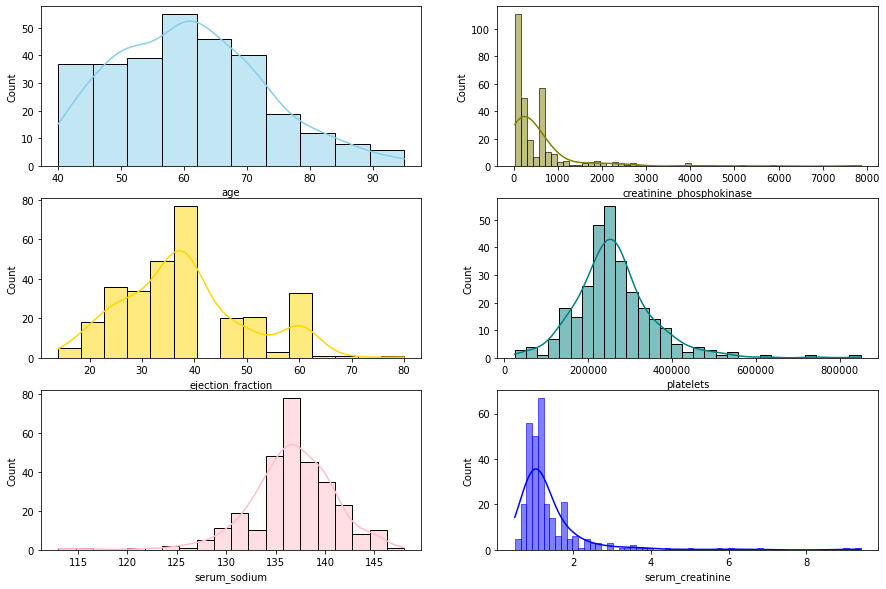

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

sns.histplot(data=HeartFail, x="age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=HeartFail, x="creatinine_phosphokinase", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=HeartFail, x="ejection_fraction", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=HeartFail, x="platelets", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=HeartFail, x="serum_sodium", kde=True, color="pink", ax=axs[2, 0])
sns.histplot(data=HeartFail, x="serum_creatinine", kde=True, Color="blue", ax=axs[2, 1])
plt.show()
######site where I learned this code

#### The above graphs show 6 of the Continuous IVs frequencies.The data shows a high amount of people in the study were inbetween 60 and 70 years old. The creatinine phosphokinase is positively skewed. The ejection fraction is relatively normally distributed. Platlets are slightly positively skewed, while serum sodium is sighly negatively skewed. And lastly, serum creatinine is postively skewed. 

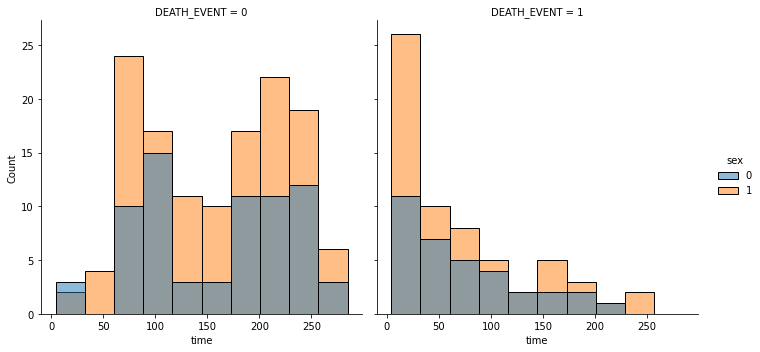

In [11]:
sns.displot(HeartFail, x='time', hue = 'sex', col = 'DEATH_EVENT', kind='hist')

#### Above graph shows time variable indicating follow up days, for both men and women as well as if there was a death or not

#### Preparing for Decision Trees and Random Forest
#### Import Packages

In [27]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [14]:
HeartFail.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### Data Wrangling

In [15]:
x = HeartFail.drop('DEATH_EVENT', axis=1)
y = HeartFail['DEATH_EVENT']

#### Test Train Split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

#### Creating Preliminary Decision Tree

In [17]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

#### Assessing the Model & Reading the Confusion Matrix

In [18]:
treePredictions = decisionTree.predict(x_test)

In [19]:
print(confusion_matrix(y_test, treePredictions))

[[51 11]
 [13 15]]


##### Confusion matrix shows 51 were predicted to not die and did not die, 11 were predicted to not die but did die, 13 were predicted to die but did not die, and 15 people were predicted to die who did die.

#### How well does the model fit?

In [20]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        62
           1       0.58      0.54      0.56        28

    accuracy                           0.73        90
   macro avg       0.69      0.68      0.68        90
weighted avg       0.73      0.73      0.73        90



#### This shows that overall, the model is 73% accurate. The model was 80% accurate in not predicting a death, while 58% accurate in predicting a death.

#### Random Forest Data Wrangling

In [21]:
x = HeartFail.drop('DEATH_EVENT', axis=1)
y = HeartFail['DEATH_EVENT']

#### Test Train Split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

#### Preliminary Random Forest Model

In [25]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

#### Checking How Well Model Fits Data

In [26]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[57  5]
 [ 8 20]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        62
           1       0.80      0.71      0.75        28

    accuracy                           0.86        90
   macro avg       0.84      0.82      0.83        90
weighted avg       0.85      0.86      0.85        90



#### This model had higher accuracy. It is 85% accurate. Model is 88% accurate in not predicting death, while 80% accurate in predicting death due to heart failure. This confusion matrix also shows less prediction error than the previous confusion matrix, as only 8 and 5 values were not accurately predicted.

#### Hyperparameter and Number of Estimators

In [28]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.8111111111111111
4 : 0.7222222222222222
5 : 0.7555555555555555
8 : 0.7777777777777778
10 : 0.8111111111111111
20 : 0.8333333333333334
50 : 0.8777777777777778
75 : 0.8555555555555555
100 : 0.8555555555555555
250 : 0.8666666666666667
500 : 0.8555555555555555


#### Plotting the Results

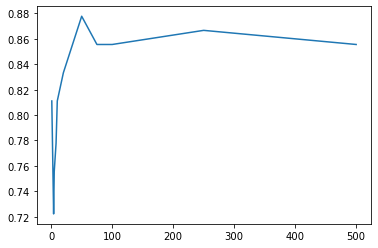

In [29]:
plt.plot(n_estimators_array, results)

#### 50 is optimal

#### Creating lists With Hyperparameter Values to Test: one list for three features: max_features, max_depth, and min_samples_leaf. Then creating a dictionary with the hyperparameter names as keys and list variables as values referred to as a grid. ######Code learned from DSO106 L3P7.


In [30]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)
####Copied code in DSO106 L3P7

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


#### Running the Random Forest

In [60]:
rf = RandomForestClassifier(n_estimators=50)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=50),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

#### Best Parameters to Use

In [61]:
rf_random.best_params_

{'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50}

In [62]:
forest = RandomForestClassifier(n_estimators=50, min_samples_leaf=4, max_features="auto", max_depth=50)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=4, n_estimators=50)

In [63]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[60  2]
 [11 17]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        62
           1       0.89      0.61      0.72        28

    accuracy                           0.86        90
   macro avg       0.87      0.79      0.81        90
weighted avg       0.86      0.86      0.85        90



#### Now we see that the model increased further in accuracy to overall 86%. The model is now 85% accurate in not predicting death, and 89% accurate in predicting a death due to heart failure.

#### Feature Importance: Determining the most influential variables contributing to heart failure in this dataset

In [64]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

time                        0.350867
serum_creatinine            0.204578
ejection_fraction           0.150622
age                         0.071118
platelets                   0.067937
creatinine_phosphokinase    0.062722
serum_sodium                0.062464
sex                         0.008289
anaemia                     0.006934
diabetes                    0.006883
high_blood_pressure         0.003932
smoking                     0.003653
dtype: float64


#### Plotting Results

<AxesSubplot:>

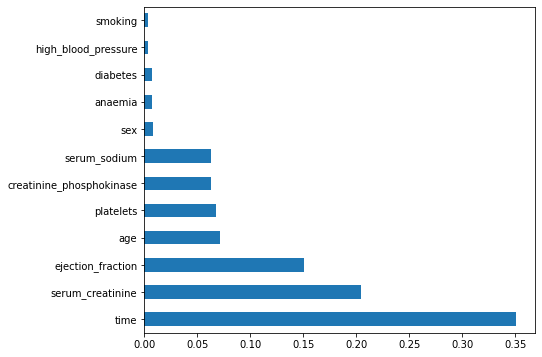

In [65]:
feature_importances.plot(kind='barh', figsize=(7,6))

#### The results are very interesting as time, which is the follow up period in days, is the most influential variable, therefore patient follow up care is critical. The next highly influential variables were serum creatinine, ejection fraction, age, platelets, creatinine phosphokinase, and serum sodium.  The least influential variables according to this data were gender, anaemia, diabetes, high blood pressure, and smoking. This is very interesting and would need to dig deeper as to why these results were produced in comparing to the framingham dataset which showed a great influence of blood pressure on a ten year risk of heart disease. And age had the greatest influence in the stroke prediction dataset. So we are seeing that in the three datasets, varying results of the influences of these similar health biometric variables.  

#### In referencing the medical article of the study on the heart failure dataset, they had removed the time variable in performing random forest
#### I am going to remove that variable as well to mirror their research and just look at the biometric factors that would contribute to heart failure in this data

In [66]:
HeartFail.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [85]:
HrtFail = HeartFail[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT']]

In [86]:
HrtFail.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [87]:
#### Now HrtFail will be the dataframe we use as the variable of 'time' has been removed

#### Decision Tree

In [90]:
x = HrtFail.drop('DEATH_EVENT', axis=1)
y = HrtFail['DEATH_EVENT']

#### Train Test Split

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

#### Creating Preliminary Decision Tree

In [92]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

#### Model Assessment

In [93]:
treePredictions = decisionTree.predict(x_test)
print(confusion_matrix(y_test, treePredictions))
print(classification_report(y_test, treePredictions))

[[49 13]
 [10 18]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        62
           1       0.58      0.64      0.61        28

    accuracy                           0.74        90
   macro avg       0.71      0.72      0.71        90
weighted avg       0.75      0.74      0.75        90



##### This model shows overall accuracy rate of 75%. It is 83% accurate in predicting not having a death, while 58% accurate in predicting a death due to heart failure.

#### Random Forest
##### Data Wrangling

In [94]:
x = HrtFail.drop('DEATH_EVENT', axis=1)
y = HrtFail['DEATH_EVENT']

#### Test Train Split

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

#### Preliminary Random Forest Model

In [96]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

#### Evaluating Model Fit

In [97]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[56  6]
 [14 14]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        62
           1       0.70      0.50      0.58        28

    accuracy                           0.78        90
   macro avg       0.75      0.70      0.72        90
weighted avg       0.77      0.78      0.77        90



#### Random Forest model shows overall 77% accuracy. 80% accuracy in predicting survival and 70% accurate in predicting death due to heart failure.

#### Hyperparameter and Number of Estimators

In [98]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.6777777777777778
4 : 0.7111111111111111
5 : 0.7111111111111111
8 : 0.7444444444444445
10 : 0.7555555555555555
20 : 0.7444444444444445
50 : 0.7222222222222222
75 : 0.7444444444444445
100 : 0.7555555555555555
250 : 0.7666666666666667
500 : 0.7777777777777778


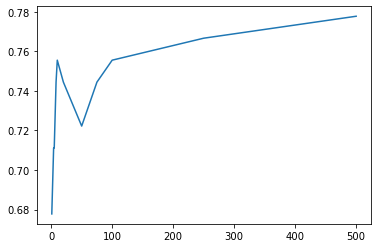

In [99]:
plt.plot(n_estimators_array, results)

#### 500 is optimal

#### Creating lists With Hyperparameter Values to Test: one list for three features: max_features, max_depth, and min_samples_leaf. Then creating a dictionary with the hyperparameter names as keys and list variables as values referred to as a grid. ######Code learned from DSO106 L3P7.

In [100]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)
#Code learned from DSO106 L3P7

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [101]:
rf = RandomForestClassifier(n_estimators=500)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

In [102]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=500),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

#### Best Parameters

In [103]:
rf_random.best_params_

{'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 80}

In [104]:
forest = RandomForestClassifier(n_estimators=500, min_samples_leaf=4, max_features="auto", max_depth=80)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=4, n_estimators=500)

##### Running the Model

In [105]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[55  7]
 [14 14]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        62
           1       0.67      0.50      0.57        28

    accuracy                           0.77        90
   macro avg       0.73      0.69      0.71        90
weighted avg       0.76      0.77      0.76        90



#### This model is overall 76% accurate. It is 80% accurate in predicting survival, while 67% accurate in predicting a death due to heart failure

#### Feature Importance

In [106]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
feature_importances

serum_creatinine            0.275357
ejection_fraction           0.221008
age                         0.156589
platelets                   0.101738
serum_sodium                0.091860
creatinine_phosphokinase    0.084575
sex                         0.016061
anaemia                     0.014897
diabetes                    0.013744
smoking                     0.012363
high_blood_pressure         0.011809
dtype: float64

<AxesSubplot:>

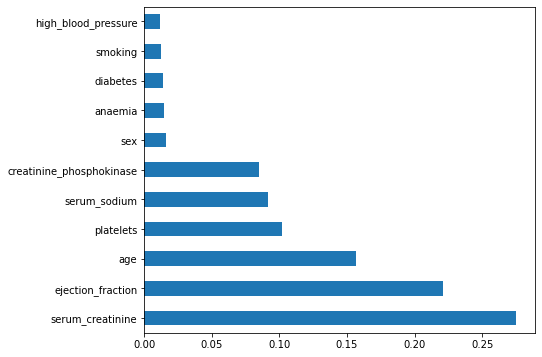

In [107]:
feature_importances.plot(kind='barh', figsize=(7,6))


#### Here the data shows that by just looking at biometric factors influencing heart failure, we see that the most influencial variable was serum creatinine followed by ejection fraction, age, platelets, serum sodium, and creatinine phosphokinase. The factors that were less influential were gender, anaemia, diabetes, smoking, and high blood pressure. That does not mean those factors are not important, just that in this particular study of 299 citizens of Pakistan, the data shows that serum creatinine and ejection fraction were the most strongly linked to contributing to heart failure. 

####### I am not a medical doctor. These thoughts are my own based on drawing inferences from the datasets. If you are concerned and have questions about your health in regards to these studies, please speak to a licensed medical professional-MP